# investigation for cutoff threshold
- test percentile based cutoff threhold

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from pydub import AudioSegment
from glob import glob
from matplotlib import pyplot as plt
import os
import IPython.display

In [3]:
def load_audio_pydub(file_path):
    # check file
    if not os.path.exists(file_path):
        raise ValueError('No file: %s' % file_path)

    # validate sound file (load as AudioSegment object
    if file_path.endswith('.wav'):
        audio_format = 'wav'
        song = AudioSegment.from_wav(file_path)
    elif file_path.endswith('.mp3'):
        audio_format = 'mp3'
        song = AudioSegment.from_mp3(file_path)
    else:
        raise ValueError('unknown format %s (valid format: %s)'% (file_path, VALID_FORMAT))

    # array.array object
    wave_array = song.get_array_of_samples()
    # numpyp array
    wave_array_np = np.array(wave_array)
    # if stereo (channel > 1)
    if song.channels != 1:
        if song.channels > 2:
            raise ValueError('audio has more than two channel: %i' % song.channels)
        wave_array_np_left = wave_array_np[0:len(wave_array_np):2]
        wave_array_np_right = wave_array_np[1:len(wave_array_np):2]
        wave_array_np_list = [wave_array_np_left, wave_array_np_right]
    else:
        wave_array_np_list = [wave_array_np]

    # information of audio file
    frame_rate = song.frame_rate
    sample_width = song.sample_width
    channels = song.channels

    return wave_array_np_list, audio_format, frame_rate, sample_width, channels

def get_threshold(data, p):
    """ percentile """
    single_array_sorted = np.sort(np.abs(data))
    ind = int(np.floor(p*len(single_array_sorted)))
    val = single_array_sorted[min(ind, len(single_array_sorted)-1)]
    return int(val)


def plot_wav(wav_data, freq, p=0.2):
    assert len(wav_data.shape) == 1
    
    amp_sorted = np.sort(np.abs(wav_data))
    th = get_threshold(wav_data, p) 
    
    plt.figure(0, figsize=(6, 4))
    plt.plot(wav_data)
    plt.plot([th]*len(wav_data), color='red', linestyle='--')
    plt.grid()
    
    interval = 10
    length_sec = int(len(wav_data)/freq) + 1
    interval = min(10, length_sec)
    ind_1 = np.arange(0, length_sec+1, int(length_sec/interval))
    ind_2 = ind_1 * freq
    plt.title('Wave signal')
    plt.xticks(ind_2, ind_1)
    plt.xlim([0, len(wav_data)])
    plt.xlabel("Time (sec.): total %0.2f" % (len(wav_data)/freq))
    plt.ylabel("Amplitude")
    
    plt.figure(1, figsize=(6, 4))
    plt.plot(amp_sorted)
    plt.plot([th]*len(wav_data), color='red', linestyle='--')
    plt.grid()
    plt.title('Wave amplitude')
    plt.xlim([0, len(wav_data)])
    plt.xlabel("Sample size lower than the amplitude")
    plt.ylabel("Amplitude")

    plt.show()
    
    print(' - length: %s' % len(wav_data))
    print(' - type  : %s' % type(wav_data[0]))
    print(' - max   : %s' % np.max(wav_data))
    print(' - min   : %s' % np.min(wav_data))
    print(' - mean  : %s' % np.mean(wav_data))
    print(' - th    : %s (%s percentile)' % (th, p))

def load_and_plot(file_path, p):
    data = load_audio_pydub(file_path)
    plot_wav(data[0][0], data[2], p)

## Statistics

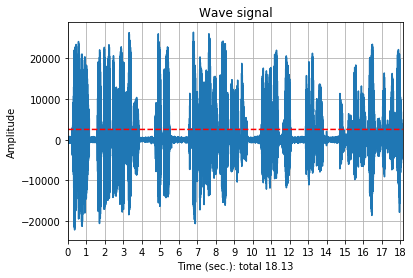

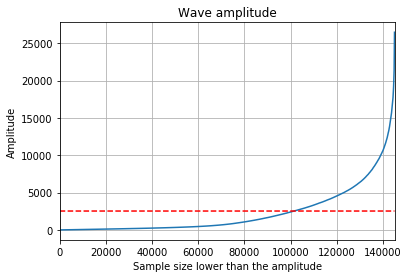

 - length: 145001
 - type  : <class 'numpy.int16'>
 - max   : 26460
 - min   : -22217
 - mean  : 0.09981310473720871
 - th    : 2528 (0.7 percentile)


In [4]:
sample_wav = '../sample_files/sample_1.wav'
perc = 0.7
load_and_plot(sample_wav, p=perc)
IPython.display.Audio(sample_wav)

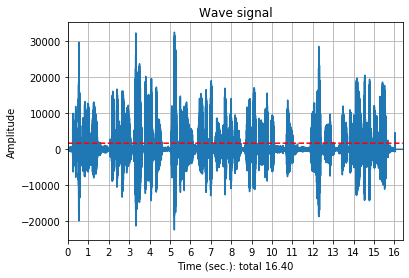

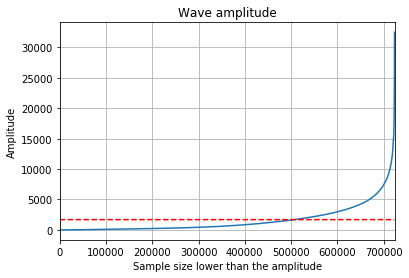

 - length: 723456
 - type  : <class 'numpy.int16'>
 - max   : 32494
 - min   : -22388
 - mean  : -0.0007547107218683652
 - th    : 1692 (0.7 percentile)


In [5]:
sample_wav = '../sample_files/sample_3.mp3'
perc = 0.7
load_and_plot(sample_wav, p=perc)
IPython.display.Audio(sample_wav)